In [10]:
import pickle
import os
import numpy as np

In [11]:
def load_results(filepath):
    """Load pareto result from pkl"""
    with open(filepath, "rb") as f:
        return np.array(pickle.load(f))

In [12]:
def domine(solution1, solution2):
    """ Return True if solution1 is dominated by solution2 """
    return all(solution2 <= solution1)


In [13]:
def efficacite_relative(X, Y):
    """ Calculates the relative efficiency of X compared to Y """
    count_non_dominated = sum(1 for x in X if not any(domine(x, y) for y in Y))
    return count_non_dominated / len(X) *100


In [14]:
def contribution(X, Y):
    """Calcule la contribution de X par rapport à Y"""
    
    X = np.array(X)
    Y = np.array(Y)

    C = []   # Solutions communes
    W1 = []  # X domine Y
    W2 = []  # Y domine X
    L1 = []  # X est dominé par Y
    L2 = []  # Y est dominé par X
    N1 = []  # Solutions ni dominantes ni dominées dans X
    N2 = []  # Solutions ni dominantes ni dominées dans Y

    for x in X:
        if any(np.array_equal(x, y) for y in Y):
            C.append(x)
        elif any(domine(y, x) for y in Y):
            W1.append(x)
        elif any(domine(x, y) for y in Y):
            L1.append(x)
        else:
            N1.append(x)

    for y in Y:
        if any(np.array_equal(y, x) for x in C):
            continue
        elif any(domine(x, y) for x in X):
            W2.append(y)
        elif any(domine(y, x) for x in X):
            L2.append(y)
        else:
            N2.append(y)

    # Comptage des éléments
    C_len = len(C)
    W1_len = len(W1)
    W2_len = len(W2)
    L1_len = len(L1)
    L2_len = len(L2)
    N1_len = len(N1)
    N2_len = len(N2)

    numérateur = (C_len / 2) + W1_len + N1_len
    dénominateur = C_len + W1_len + W2_len + N1_len + N2_len

    # Évite la division par zéro
    if dénominateur == 0:
        return 0  


    return (numérateur / dénominateur)*100


In [15]:
out_path = os.path.join(os.path.dirname(os.getcwd()), "output")

output_file_mofda = os.path.join(out_path, "mofda_results.pkl")
output_file_puma = os.path.join(out_path, "puma_results.pkl")
output_file_nsga = os.path.join(out_path, "nsga_results.pkl")

mofda_results = load_results(output_file_mofda)
puma_results = load_results(output_file_puma)
nsga_results = load_results(output_file_nsga)


# Efficacité relative
eff_mofda_vs_puma = efficacite_relative(mofda_results, puma_results)
eff_mofda_vs_nsga = efficacite_relative(mofda_results, nsga_results)

eff_puma_vs_mofda = efficacite_relative(puma_results, mofda_results)
eff_puma_vs_nsga = efficacite_relative(puma_results, nsga_results)

eff_nsga_vs_mofda = efficacite_relative(nsga_results, mofda_results)
eff_nsga_vs_puma = efficacite_relative(nsga_results, puma_results)


# Contribution
cont_mofda_vs_puma = contribution(mofda_results, puma_results)
cont_mofda_vs_nsga = contribution(mofda_results, nsga_results)

cont_puma_vs_mofda = contribution(puma_results, mofda_results)
cont_puma_vs_nsga = contribution(puma_results, nsga_results)

cont_nsga_vs_mofda = contribution(nsga_results, mofda_results)
cont_nsga_vs_puma = contribution(nsga_results, puma_results)


In [16]:
print("---------  Efficacité relative  -----------------")
print(f"MOFDA vs PUMA : {eff_mofda_vs_puma:.0f}%")
print(f"MOFDA vs NSGA : {eff_mofda_vs_nsga:.0f}%\n")

print(f"PUMA vs MOFDA : {eff_puma_vs_mofda:.0f}%")
print(f"PUMA vs NSGA : {eff_puma_vs_nsga:.0f}%\n")

print(f"NSGA vs MOFDA : {eff_nsga_vs_mofda:.0f}%")
print(f"NSGA vs PUMA : {eff_nsga_vs_puma:.0f}%")


print("\n\n---------  Contribution  -----------------")
print(f"Contribution de MOFDA par rapport à PUMA : {cont_mofda_vs_puma:.0f}%")
print(f"Contribution de MOFDA par rapport à NSGA : {cont_mofda_vs_nsga:.0f}%\n")

print(f"Contribution de PUMA par rapport à MOFDA : {cont_puma_vs_mofda:.0f}%")
print(f"Contribution de PUMA par rapport à NSGA : {cont_puma_vs_nsga:.0f}%\n")

print(f"Contribution de NSGA par rapport à MOFDA : {cont_nsga_vs_mofda:.0f}%")
print(f"Contribution de NSGA par rapport à PUMA : {cont_nsga_vs_puma:.0f}%")

print("\n\nNombre éléments Pareto")
print(f"MOFDA : {len(mofda_results)}")
print(f"PUMA : {len(puma_results)}")
print(f"NSGA : {len(nsga_results)}")



---------  Efficacité relative  -----------------
MOFDA vs PUMA : 100%
MOFDA vs NSGA : 100%

PUMA vs MOFDA : 0%
PUMA vs NSGA : 100%

NSGA vs MOFDA : 0%
NSGA vs PUMA : 96%


---------  Contribution  -----------------
Contribution de MOFDA par rapport à PUMA : 100%
Contribution de MOFDA par rapport à NSGA : 100%

Contribution de PUMA par rapport à MOFDA : 0%
Contribution de PUMA par rapport à NSGA : 14%

Contribution de NSGA par rapport à MOFDA : 0%
Contribution de NSGA par rapport à PUMA : 86%


Nombre éléments Pareto
MOFDA : 72
PUMA : 4
NSGA : 26


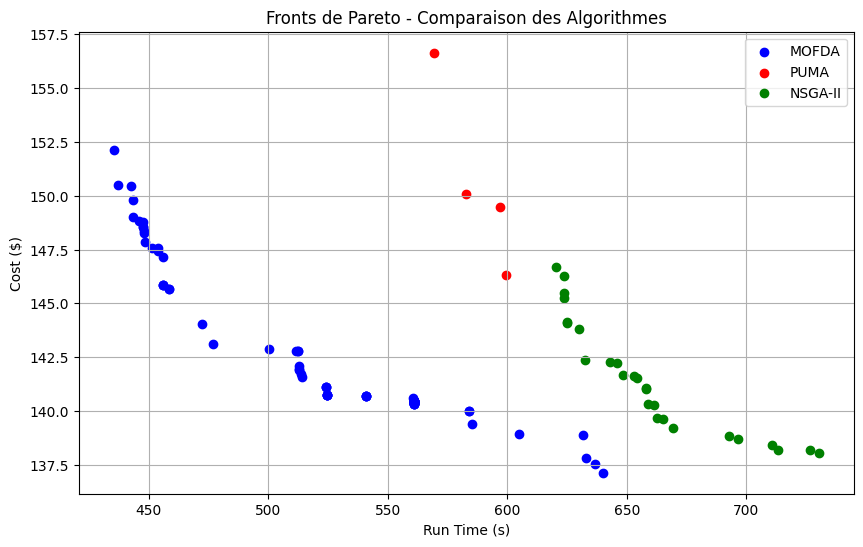

In [17]:
import matplotlib.pyplot as plt

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé des points pour chaque algorithme
plt.scatter(mofda_results[:, 0], mofda_results[:, 1], color='blue', label="MOFDA")
plt.scatter(puma_results[:, 0], puma_results[:, 1], color='red', label="PUMA")
plt.scatter(nsga_results[:, 0], nsga_results[:, 1], color='green', label="NSGA-II")

# Étiquettes des axes
plt.xlabel("Run Time (s)")
plt.ylabel("Cost ($)")
plt.title("Fronts de Pareto - Comparaison des Algorithmes")

# Affichage de la légende et de la grille
plt.legend()
plt.grid()
plt.show()


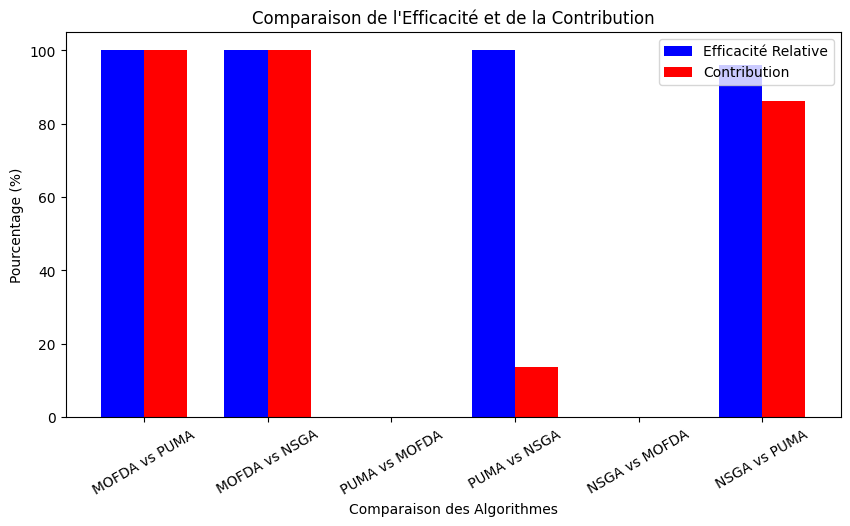

In [18]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["MOFDA vs PUMA", "MOFDA vs NSGA", "PUMA vs MOFDA", "PUMA vs NSGA", "NSGA vs MOFDA", "NSGA vs PUMA"]
eff_values = [eff_mofda_vs_puma, eff_mofda_vs_nsga, eff_puma_vs_mofda, eff_puma_vs_nsga, eff_nsga_vs_mofda, eff_nsga_vs_puma]
cont_values = [cont_mofda_vs_puma, cont_mofda_vs_nsga, cont_puma_vs_mofda, cont_puma_vs_nsga, cont_nsga_vs_mofda, cont_nsga_vs_puma]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, eff_values, width, label="Efficacité Relative", color='blue')
bars2 = ax.bar(x + width/2, cont_values, width, label="Contribution", color='red')

ax.set_xlabel("Comparaison des Algorithmes")
ax.set_ylabel("Pourcentage (%)")
ax.set_title("Comparaison de l'Efficacité et de la Contribution")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

plt.show()
